# Student Perfomence Indicator

## Life cycle of Machine Learning Project
    Understanding the Problem Statement
    Data Collection
    Data checks to perform
    Exploratory data Analysis (EDA)
    Data Pre-Procession
    Model Training
    Choose best model


## 1) Problem Statement
    This project understands how the students performance (test scores) is affected by other variables such as Gender, Ethinicity, Parental level of eduation,Lunch and test preparation course 

## 2) Data Collection
    Dataset Source -  https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
    The Data consists of 8 column and 1000 Rows

### 2.1) Import required modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import warnings as w
w.filterwarnings('ignore')

### 2.2) Data Ingestion


In [2]:
df = pd.read_csv(os.path.join(os.getcwd(),'Data.csv'))

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

### 2.3) Checking for Missing Values

In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### No Missing Values in the Data Set

In [6]:
cat_features = [feature for feature in df.columns if df[feature].dtypes=="O"]
print(cat_features)

['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [7]:
num_features = [feature for feature in df.columns if df[feature].dtypes!="O"]
print(num_features)

['math score', 'reading score', 'writing score']


In [8]:
df[num_features]

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [9]:
df[num_features].describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insights

    - The Mean are almost same for all numerical column Range from (66-69)
    - The Standard deviations is also close in all numberical columns (14-15)
    - From the above mean and standard Deviation shows the numerical columns are Normaly distributed
    - Some People in math_score got mark which equal to Zero

In [10]:

 def num_chat(num_features,histplot):
    """This Function Is created to Plot Histogram of different Numerical Columns """
    fig,axs= plt.subplots(nrows=len(num_features),ncols=1,figsize = (8,8))
    for i in range(len(num_features)):

        histplot(df[num_features[i]],ax=axs[i])
        axs[i].set_title(f"Histogtam of {num_features[i]}")
        plt.tight_layout()



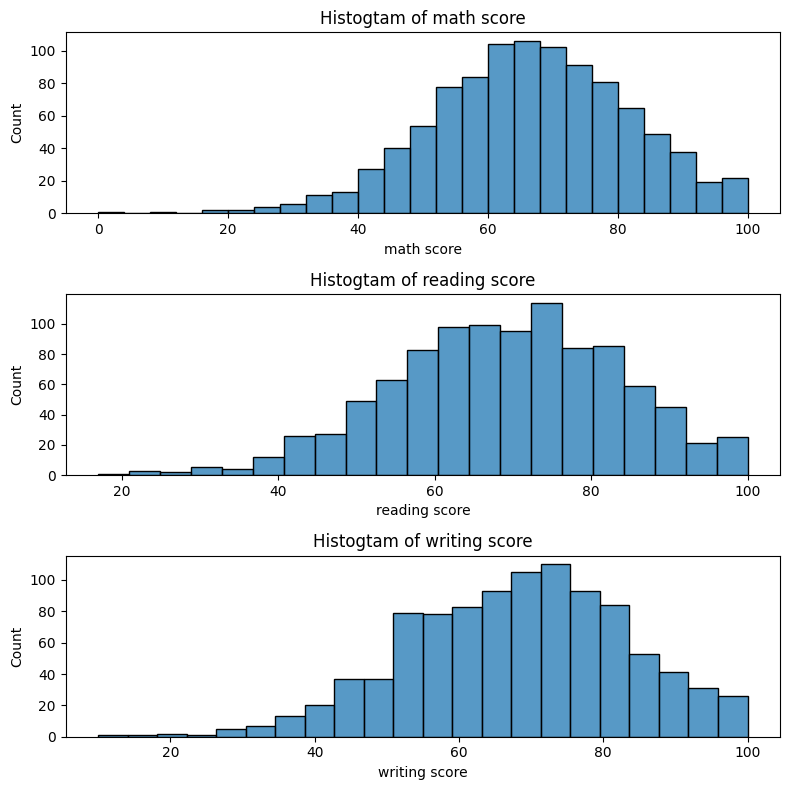

In [11]:
num_chat(num_features,sns.histplot)

#### Insights

    - From the above Plots we can confirm the hypothisis thet the data is normaly distributed on all numberical columns

In [12]:
print(cat_features)
print("="*30)
print("Count of Cat_feature =",len(cat_features))
print("-"*50)

print(num_features)
print("="*30)

print("Count of num_features =",len(num_features))
print("-"*50)


['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
Count of Cat_feature = 5
--------------------------------------------------
['math score', 'reading score', 'writing score']
Count of num_features = 3
--------------------------------------------------


#### Insights

    - There are 5 Cathagorical value in the data set
    - There are 3 Numbercal Columns in the data set

## 2.4) Creating a New Features Named "Total_score , Average_score"

In [13]:
df['total_score'] = df[num_features[0]] + df[num_features[1]] + df[num_features[2]]
df['average_score'] = df['total_score']/3
df.describe()

,math score,reading score,writing score,total_score,average_score
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000,67.770667
std,15.16308,14.600192,15.195657,42.771978,14.257326
min,0.00000,17.000000,10.000000,27.000000,9.000000
25%,57.00000,59.000000,57.750000,175.000000,58.333333
50%,66.00000,70.000000,69.000000,205.000000,68.333333
75%,77.00000,79.000000,79.000000,233.000000,77.666667
max,100.00000,100.000000,100.000000,300.000000,100.000000


#### Insights

    - The total marks ie 300 which means all maximum score is 100
    - The average marks for both male and female is 203.3


In [14]:
def cat_plot(cat_features,num_features,kind):
    """The function is use to Create Bar charts with cathogorical and numerical feature"""
    fig,axs= plt.subplots(nrows=3,ncols=2,figsize = (10,15))
    plt.subplots_adjust(top=1)
    for i in range(len(cat_features)):
        ax = plt.subplot(511+i)
        kind(x =cat_features[i] ,y=num_features,data=df)
        sns.pointplot(data=df, x =cat_features[i] ,y=num_features,ax=ax, color="black")
        ax.set_title(f"The Feature {cat_features[i]} and their count of {num_features}")
        plt.tight_layout()


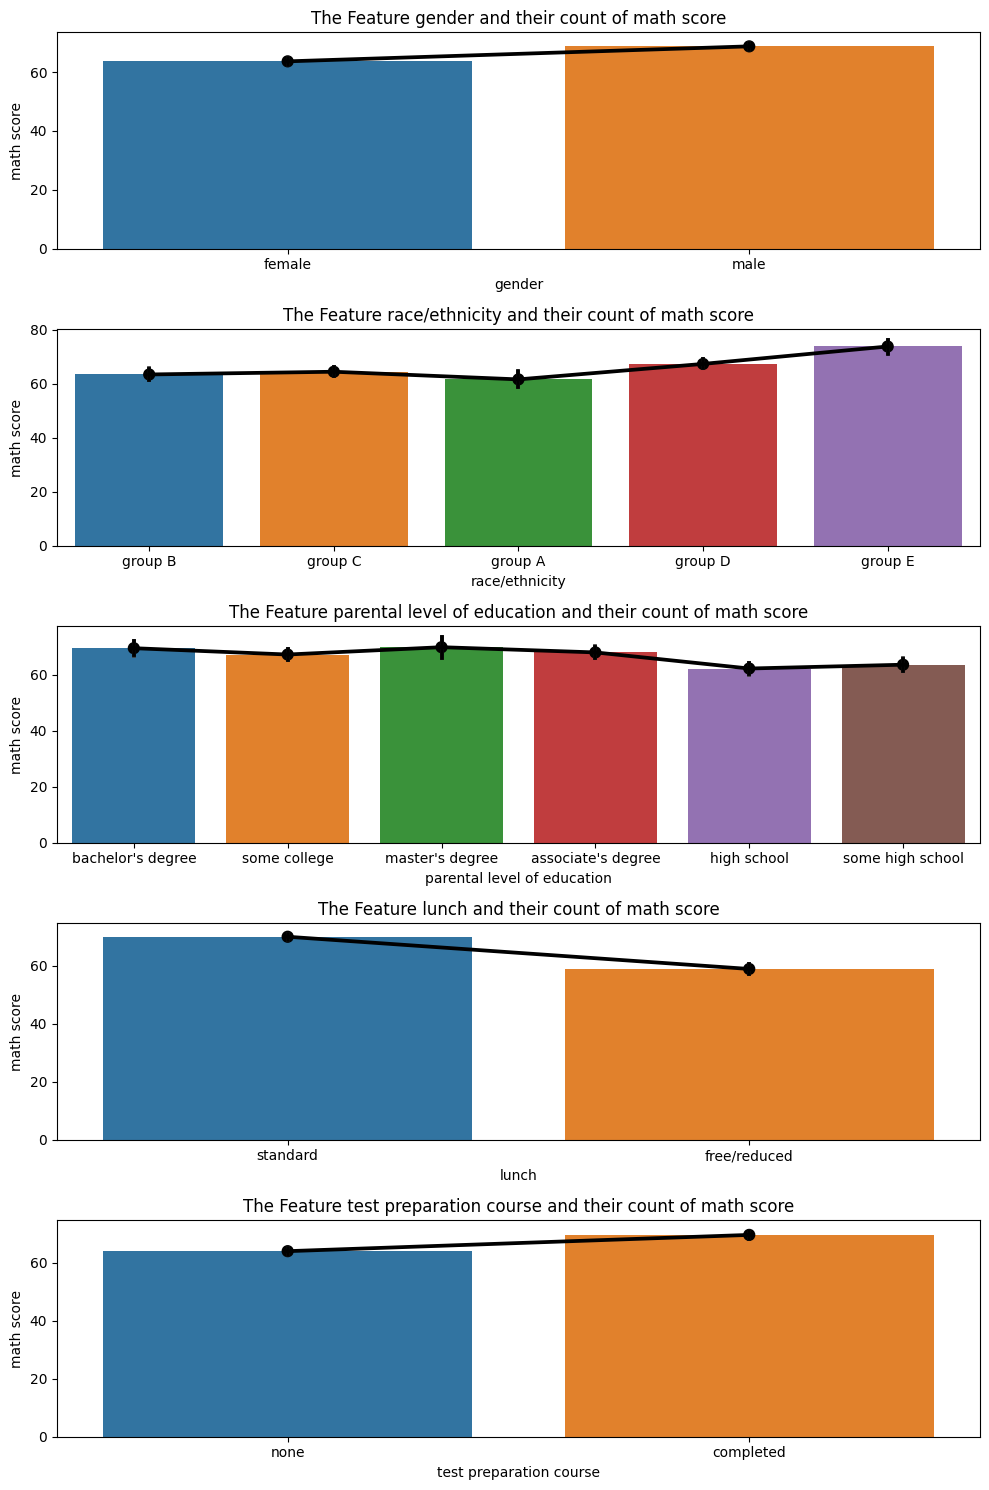

In [15]:
cat_plot(cat_features,num_features[0],sns.barplot)

#### Insights

    - From the above chats we can able to say in math some male student get high marks 
      so that the average is high for male compare to female
    - Math score average is very high for Standard Lunch in comparision with free/reduced lunch
    - The Group E race/ethinity have the high Average score in Math Score

### Visulaizing the Data to Conclude the Decisions


Average Score Histplot with respect to gender

Text(0.5, 1.0, 'Histogram of average_score')

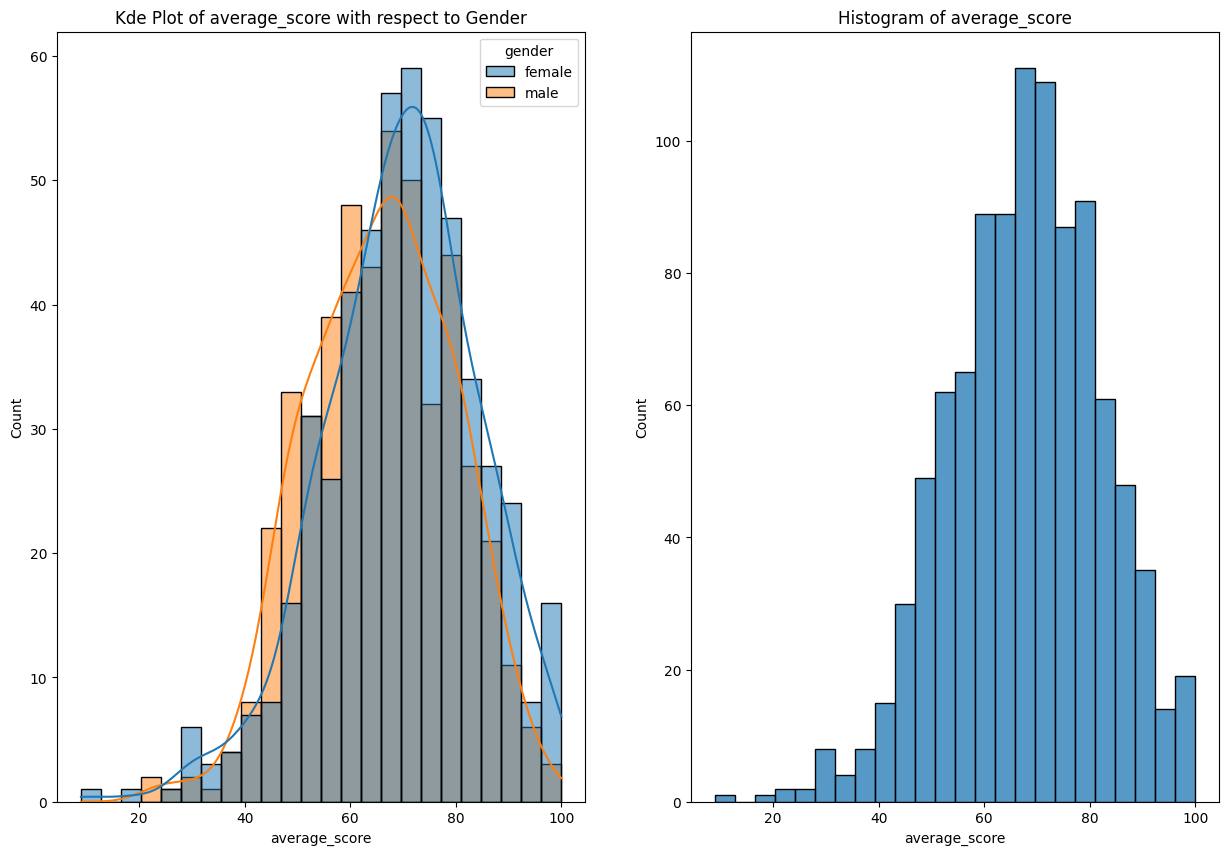

In [16]:
fig,ax = plt.subplots(1,2,figsize= (15,10))

sns.histplot(x = 'average_score',hue = 'gender',data = df,ax = ax[0],kde=True)
sns.histplot(x = 'average_score',data = df,ax = ax[1])
ax[0].set_title('Kde Plot of average_score with respect to Gender')
ax[1].set_title('Histogram of average_score')

#### Insights

    - From the Above plot the Female performed good compare to male average score

Total Score Histplot with respect to gender

Text(0.5, 1.0, 'Histogram of total_score')

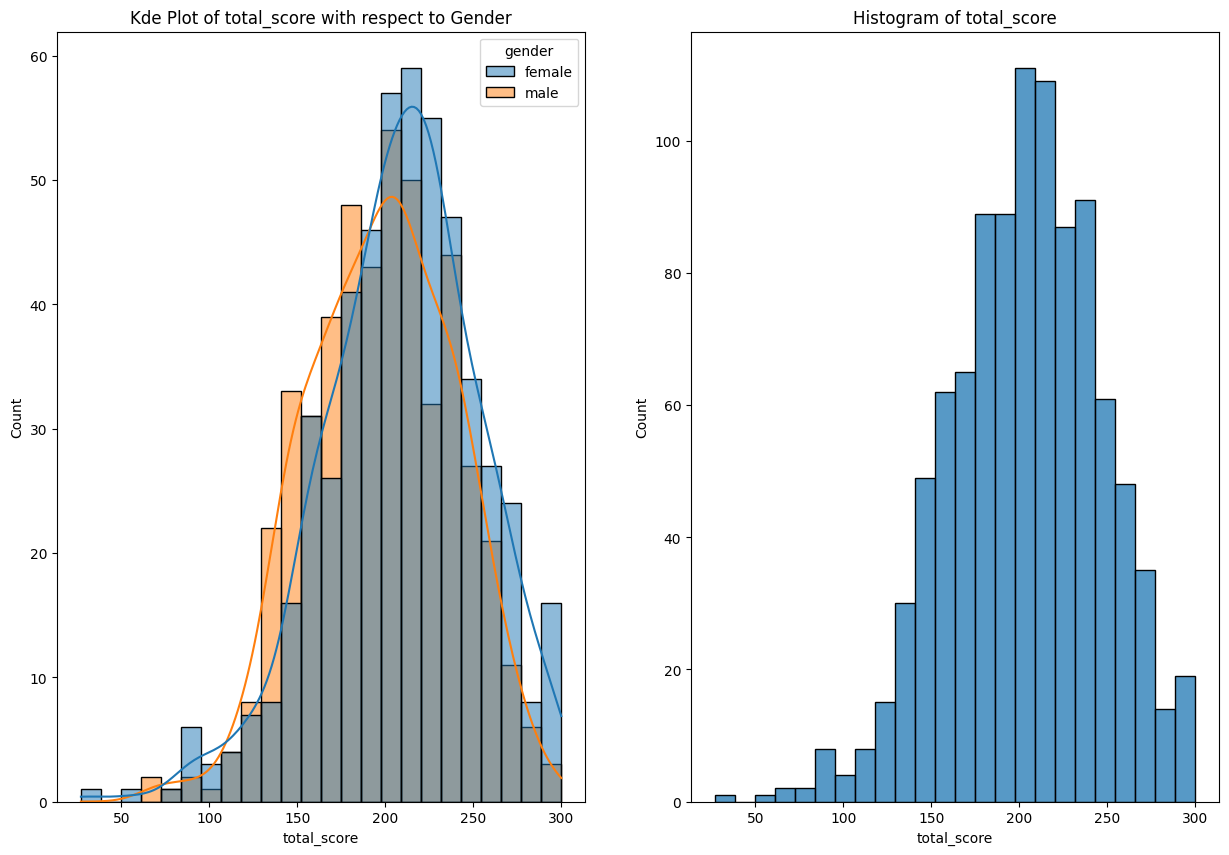

In [17]:
fig,ax = plt.subplots(1,2,figsize= (15,10))

sns.histplot(x = 'total_score',hue = 'gender',data = df,ax = ax[0],kde=True)
sns.histplot(x = 'total_score',data = df,ax = ax[1])
ax[0].set_title('Kde Plot of total_score with respect to Gender')
ax[1].set_title('Histogram of total_score')

#### Countplot of Gender and lunch

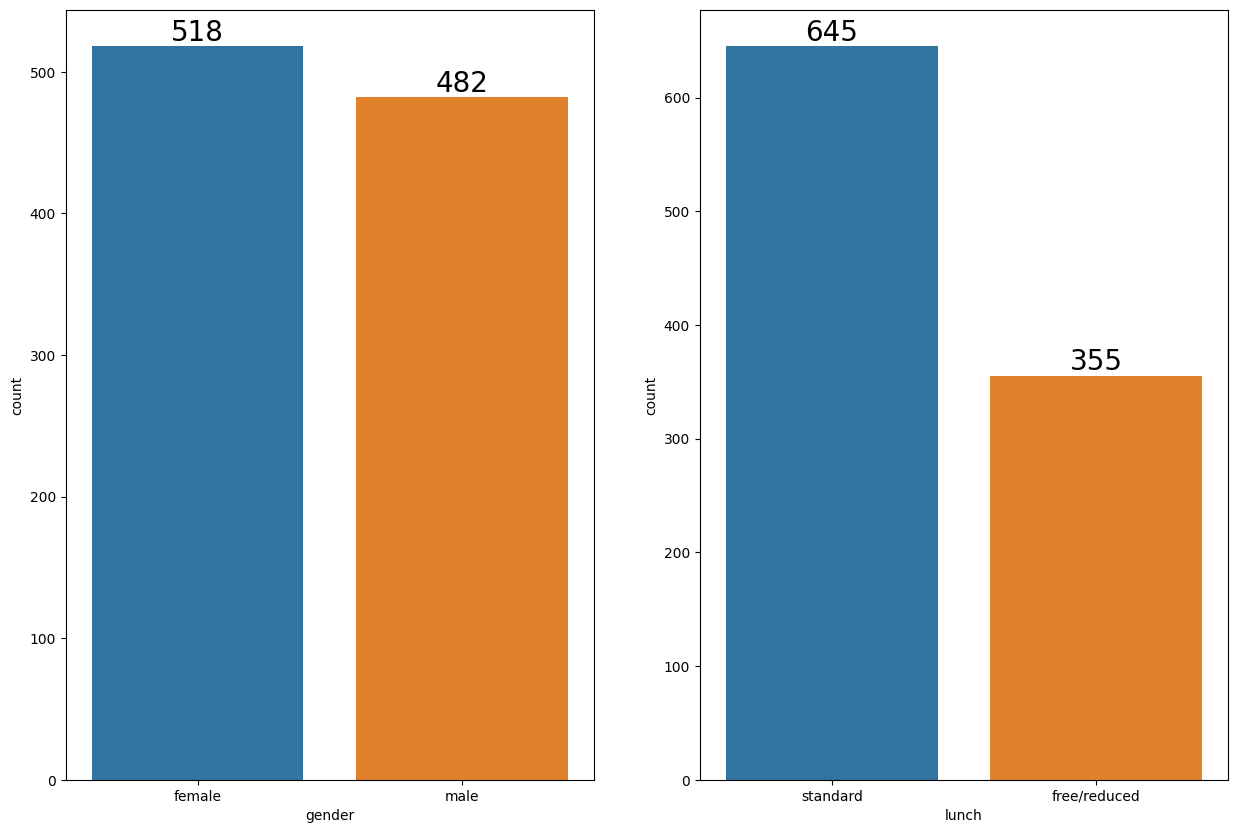

In [18]:
fig,ax = plt.subplots(1,2,figsize= (15,10))
sns.countplot(x='gender',data=df,ax = ax[0])
sns.countplot(x='lunch',data=df,ax = ax[1])
for i in range(len(ax)):
    for container in ax[i].containers:
        ax[i].bar_label(container,color='black',size=20)   
          

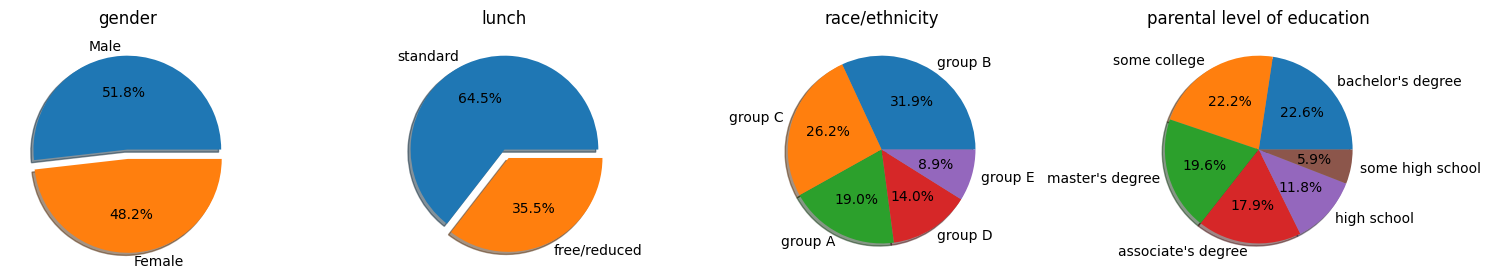

In [19]:
plt.subplots(1,4,figsize=(15,15))
ax = plt.subplot(141)
pie_chart = plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],\
    autopct='%1.1f%%',shadow=True)
ax.set_title ('gender')
ax = plt.subplot(142)
pie_chart = plt.pie(x=df['lunch'].value_counts(),labels=['standard','free/reduced'],explode=[0,0.1],\
    autopct='%1.1f%%',shadow=True)
ax.set_title ('lunch')
ax =plt.subplot(143)
pie_chart = plt.pie(x=df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].unique(),\
    autopct='%1.1f%%',shadow=True)
ax.set_title ('race/ethnicity')
ax = plt.subplot(144)
pie_chart = plt.pie(x=df['parental level of education'].value_counts(),labels=df['parental level of education'].unique(),\
    autopct='%1.1f%%',shadow=True)
ax.set_title ('parental level of education')
plt.tight_layout()

#### Insights

    - The Females and males are Balanced male = 51%, female = 48%
    - The Standard lunch is provided for most of the students 64% of students
    - 32% of students are from Group B and Group C is 26% of the student
    - it shows 50% of students come under group b and Group C

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) 

In [20]:
gender_groups = df.groupby('gender')[['math score','average_score']].mean()
gender_groups = gender_groups.reset_index()
gender_groups

,gender,math score,average_score
0,female,63.633205,69.569498
1,male,68.728216,65.837483


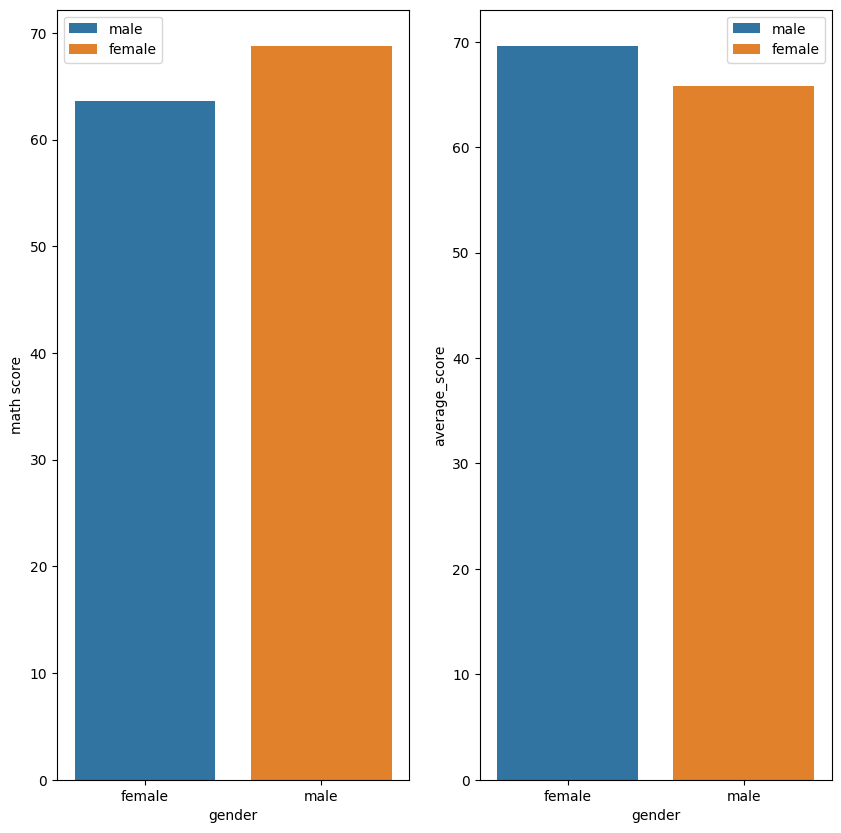

In [21]:
fig , axs =plt.subplots(1,2,figsize = (10,10))
axq = plt.subplot(121)
sns.barplot(x='gender', y='math score' ,data = gender_groups, ax =axq,label = ['male','female'])
plt.legend()

axq = plt.subplot(122)
sns.barplot(x='gender', y='average_score' ,data = gender_groups, ax =axq,label = ['male','female'])
plt.legend()

plt.show()

#### Insights

    - Male students performed well in Math_score
    - But Females performed higher than males in overall average

In [22]:
race_ethnicity = df.groupby('race/ethnicity')[['math score','average_score']].mean()
race_ethnicity = race_ethnicity.reset_index()
race_ethnicity

,race/ethnicity,math score,average_score
0,group A,61.629213,62.992509
1,group B,63.452632,65.468421
2,group C,64.463950,67.131661
3,group D,67.362595,69.179389
4,group E,73.821429,72.752381


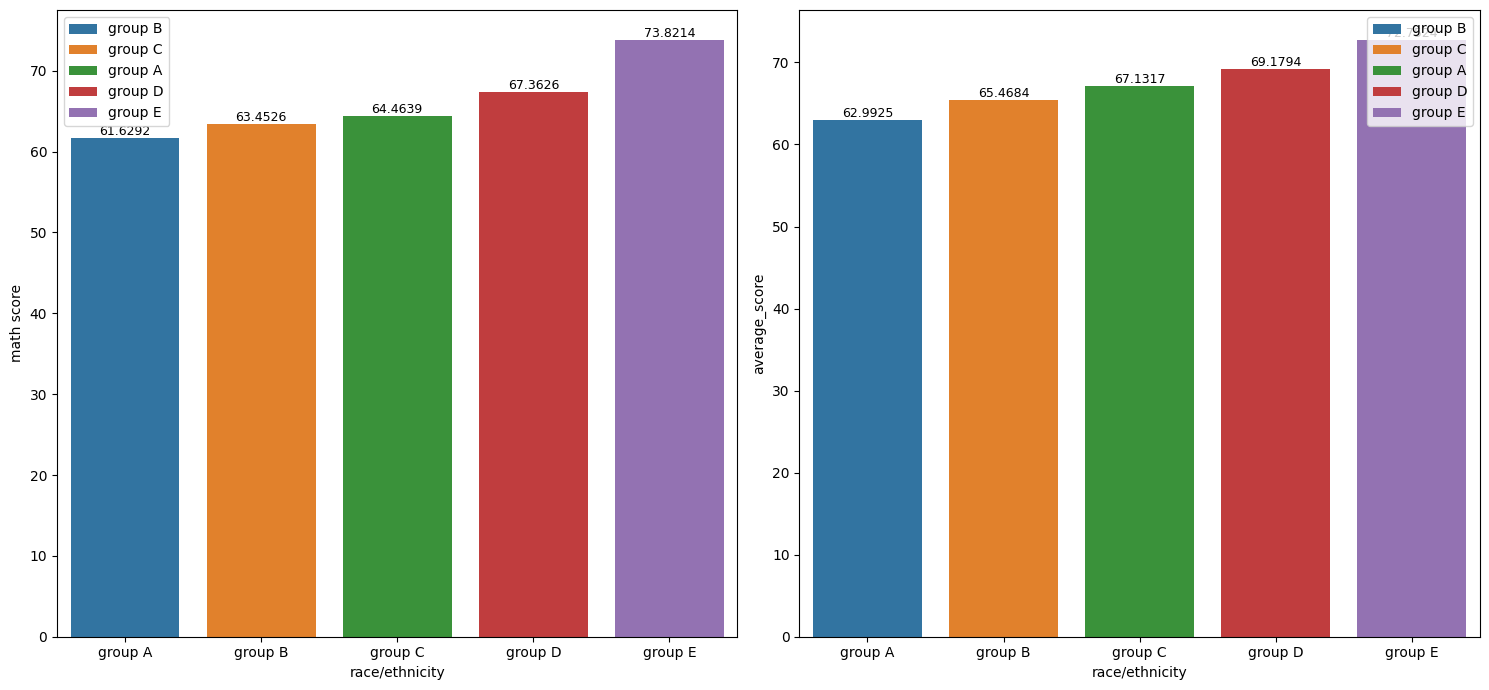

In [23]:

fig , axs =plt.subplots(1,2,figsize = (15,7))
axq = plt.subplot(121)
sns.barplot(x='race/ethnicity', y='math score' ,data = race_ethnicity, ax =axq,label = df['race/ethnicity'].unique())
for container in axq.containers:
    axq.bar_label(container,color='black',size=9)
plt.legend()

axq = plt.subplot(122)
sns.barplot(x='race/ethnicity', y='average_score' ,data = race_ethnicity, ax =axq,label = df['race/ethnicity'].unique())
for container in axq.containers:
    axq.bar_label(container,color='black',size=9)
plt.legend()
plt.tight_layout()
plt.show()

#### Insights

    - Group E people perfomed well in math_score
    - Group A Pople perfomed poorly in all the scores

In [24]:
parent_level = df.groupby('parental level of education')[['math score','average_score']].mean()
parent_level = parent_level.reset_index()
parent_level

,parental level of education,math score,average_score
0,associate's degree,67.882883,69.569069
1,bachelor's degree,69.389831,71.923729
2,high school,62.137755,63.096939
3,master's degree,69.745763,73.598870
4,some college,67.128319,68.476401
5,some high school,63.497207,65.108007


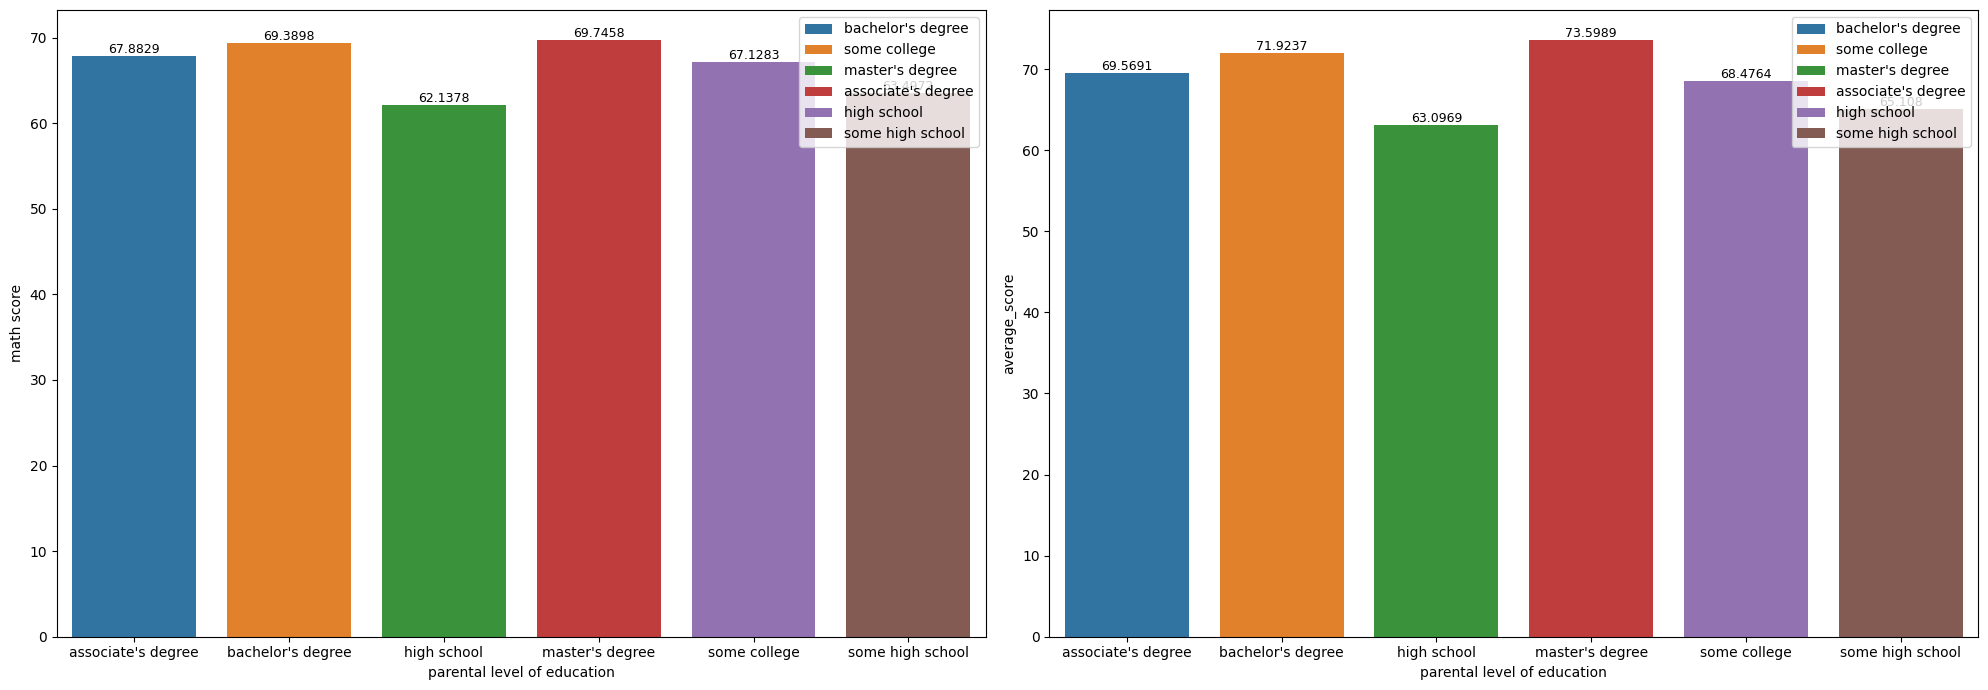

In [25]:

fig , axs =plt.subplots(1,2,figsize = (20,7))
axq = plt.subplot(121)
sns.barplot(x='parental level of education', y='math score' ,data = parent_level, ax =axq,label = df['parental level of education'].unique())
for container in axq.containers:
    axq.bar_label(container,color='black',size=9)
plt.legend()

axq = plt.subplot(122)
sns.barplot(x='parental level of education', y='average_score' ,data = parent_level, ax =axq,label = df['parental level of education'].unique())
for container in axq.containers:
    axq.bar_label(container,color='black',size=9)
plt.legend()
plt.tight_layout()
plt.show()

#### Insights

    - The students who's parent level of education with master degree or bachelor's degree are performed good at math and overall score

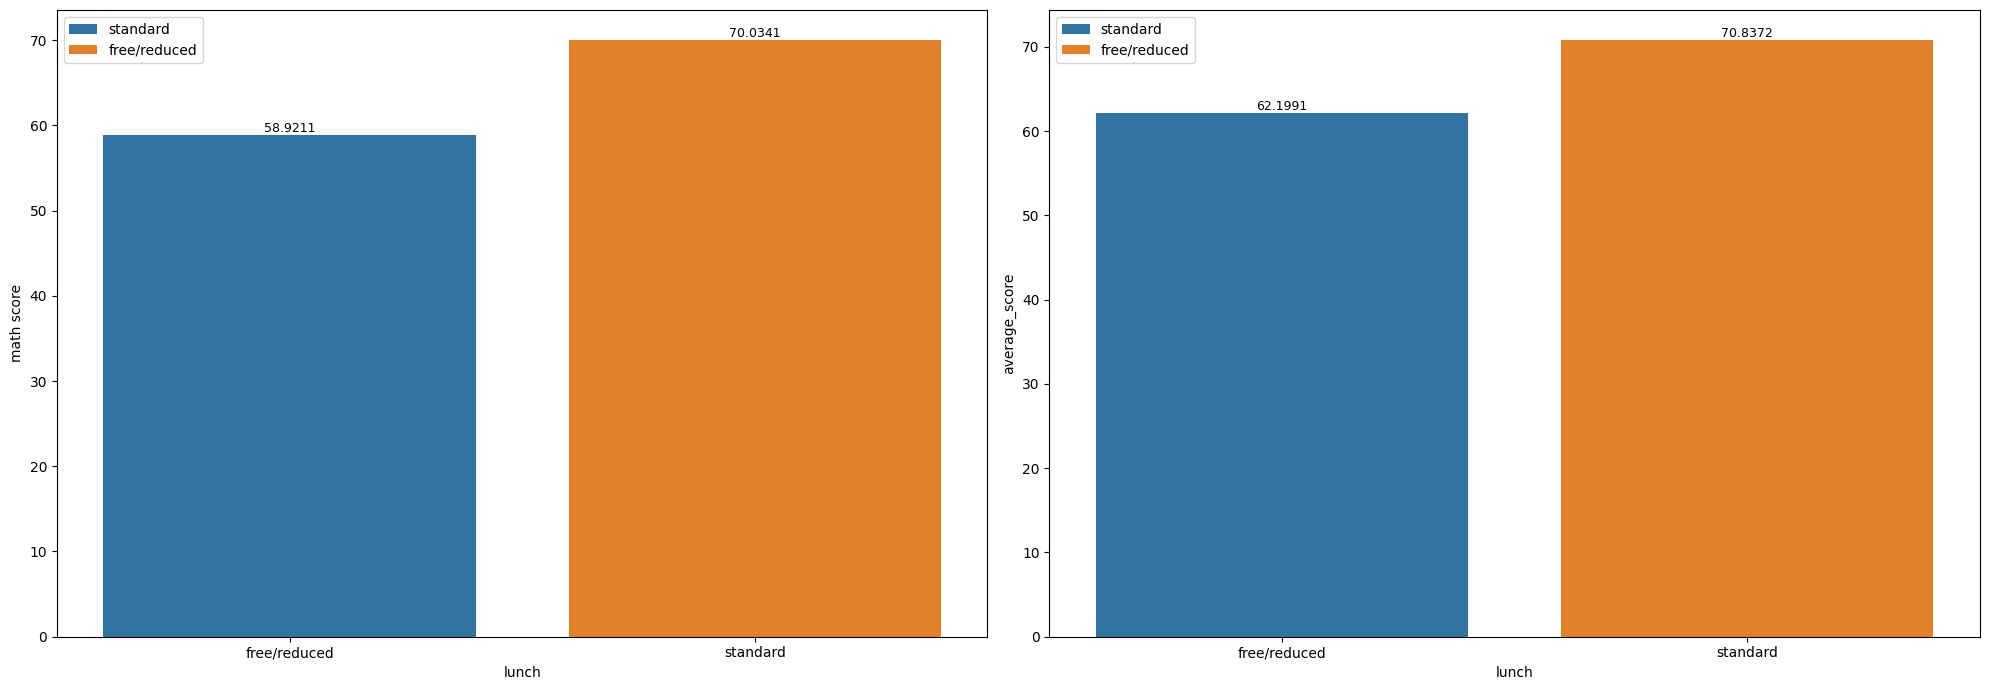

In [26]:

lunch = df.groupby('lunch')[['math score','average_score']].mean()
lunch = lunch.reset_index()
lunch

fig , axs =plt.subplots(1,2,figsize = (20,7))
axq = plt.subplot(121)
sns.barplot(x='lunch', y='math score' ,data = lunch, ax =axq,label = df['lunch'].unique())
for container in axq.containers:
    axq.bar_label(container,color='black',size=9)
plt.legend()

axq = plt.subplot(122)
sns.barplot(x='lunch', y='average_score' ,data = lunch, ax =axq,label = df['lunch'].unique())
for container in axq.containers:
    axq.bar_label(container,color='black',size=9)
plt.legend()
plt.tight_layout()
plt.show()

#### Insights

    - The student who have standard lunch are performed well comapre to free/reduced

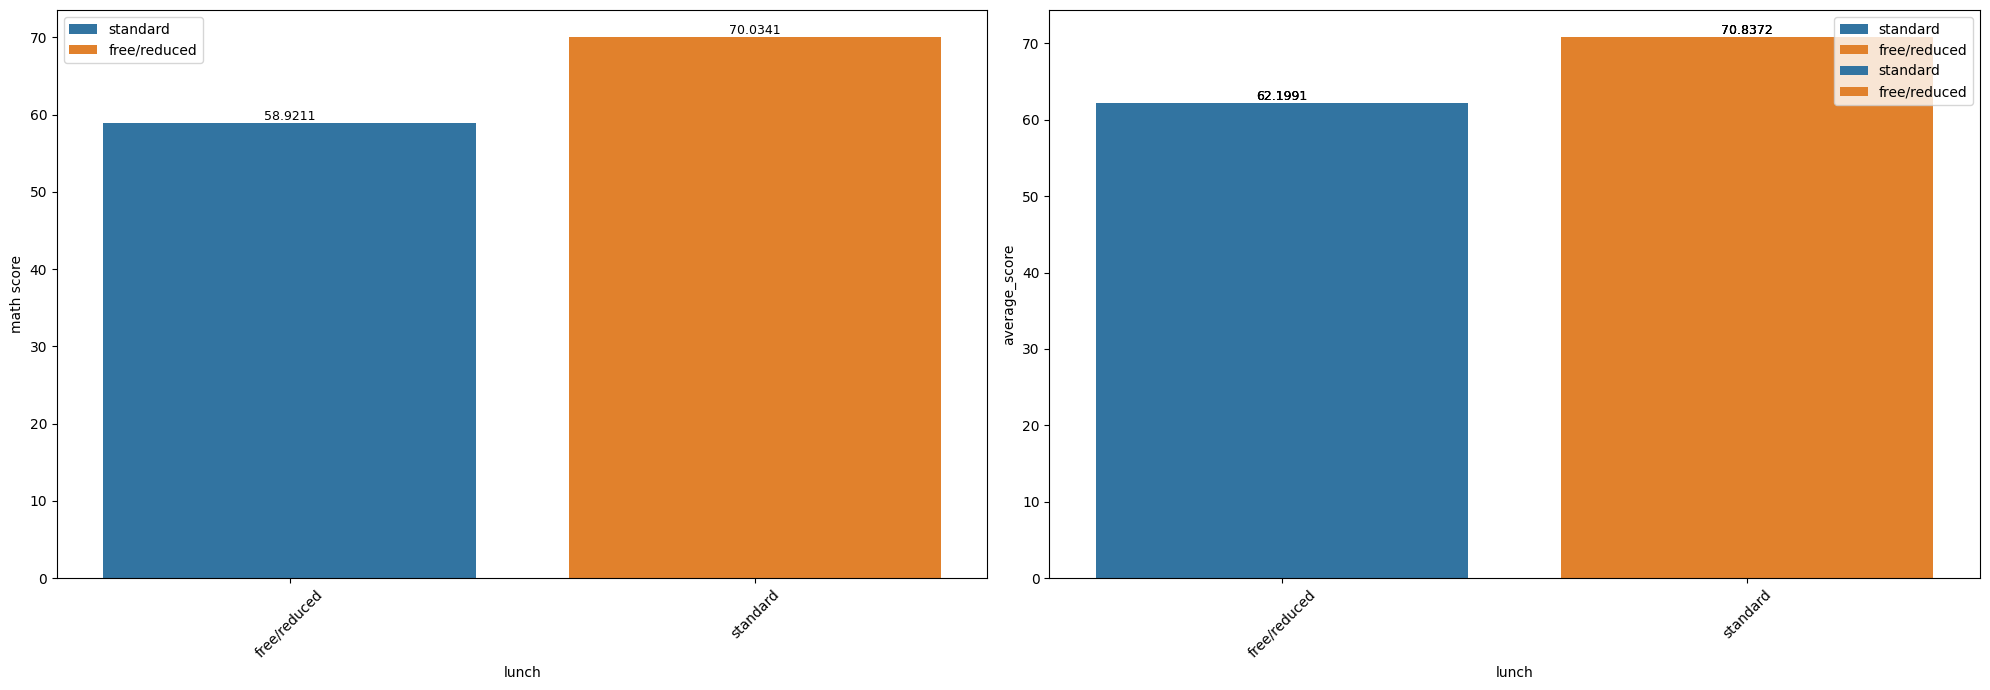

In [66]:

lunch = df.groupby('lunch')[['math score','average_score']].mean()
lunch = lunch.reset_index()
lunch

fig , axs =plt.subplots(1,3,figsize = (20,7))
axq = plt.subplot(121)
sns.barplot(x='lunch', y='math score' ,data = lunch, ax =axq,label = df['lunch'].unique())
for container in axq.containers:
    axq.bar_label(container,color='black',size=9)
    plt.xticks(rotation= 45)
plt.legend()

axq = plt.subplot(122)
sns.barplot(x='lunch', y='average_score' ,data = lunch, ax =axq,label = df['lunch'].unique())
for container in axq.containers:
    axq.bar_label(container,color='black',size=9)
    plt.xticks(rotation= 45)
plt.legend()

axq = plt.subplot(122)
sns.barplot(x='lunch', y='average_score' ,data = lunch, ax =axq,label = df['lunch'].unique())
for container in axq.containers:
    axq.bar_label(container,color='black',size=9)
    plt.xticks(rotation= 45)
plt.legend()

plt.tight_layout()
plt.show()

In [38]:
df.head(
    
)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [68]:
def data_variable(feature):

    data_group = df.groupby(feature)[['math score','reading score','writing score']].mean()
    data_group = data_group.reset_index()
    return data_group
    
def data_chart(function,feature):
    data_group = function(feature)
    fig , axs =plt.subplots(1,4,figsize = (20,7))
    axq = plt.subplot(131)
    sns.barplot(x= feature, y='math score' ,data = data_group, ax =axq,label = df[feature].unique())
    for container in axq.containers:
        axq.bar_label(container,color='black',size=9)
    plt.xticks(rotation= 45)


    axq = plt.subplot(132)
    sns.barplot(x= feature, y='reading score' ,data = data_group, ax =axq,label = df[feature].unique())
    for container in axq.containers:
        axq.bar_label(container,color='black',size=9)
    plt.xticks(rotation= 45)

    axq = plt.subplot(133)
    sns.barplot(x= feature, y='writing score' ,data = data_group, ax =axq,label = df[feature].unique())
    for container in axq.containers:
        axq.bar_label(container,color='black',size=9)
    plt.xticks(rotation= 45)

    plt.tight_layout()
    plt.show()
        

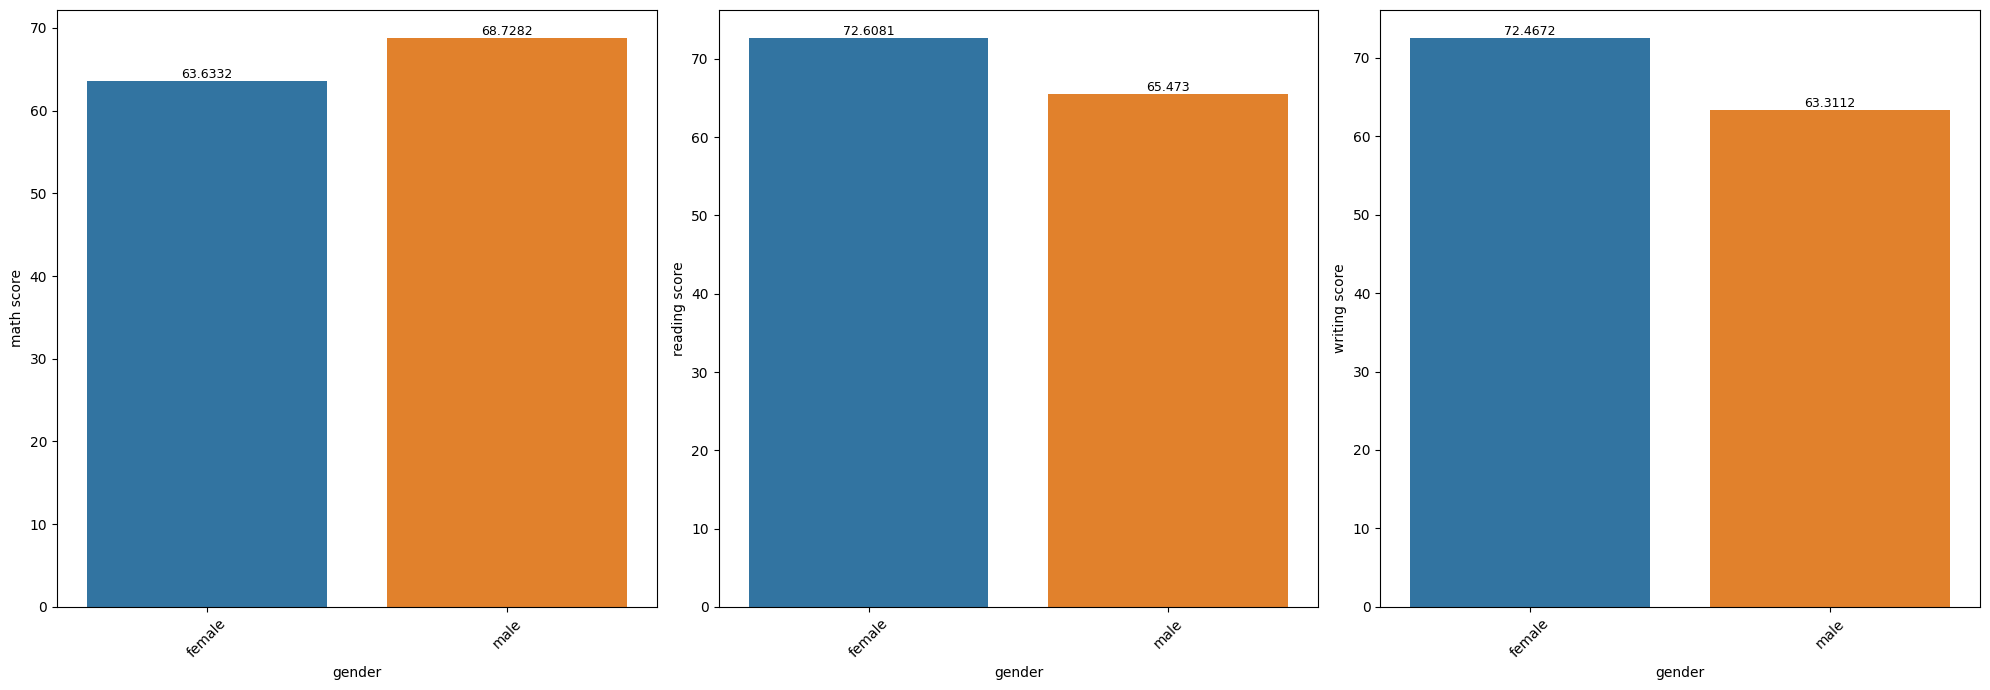

In [69]:
data_chart(data_variable,'gender')

### Insight:
    - From above plot we can see male students Performed well in Math_score
    - But on reading_score, writting_score female students permormed well, So it make female student performed well on overall score

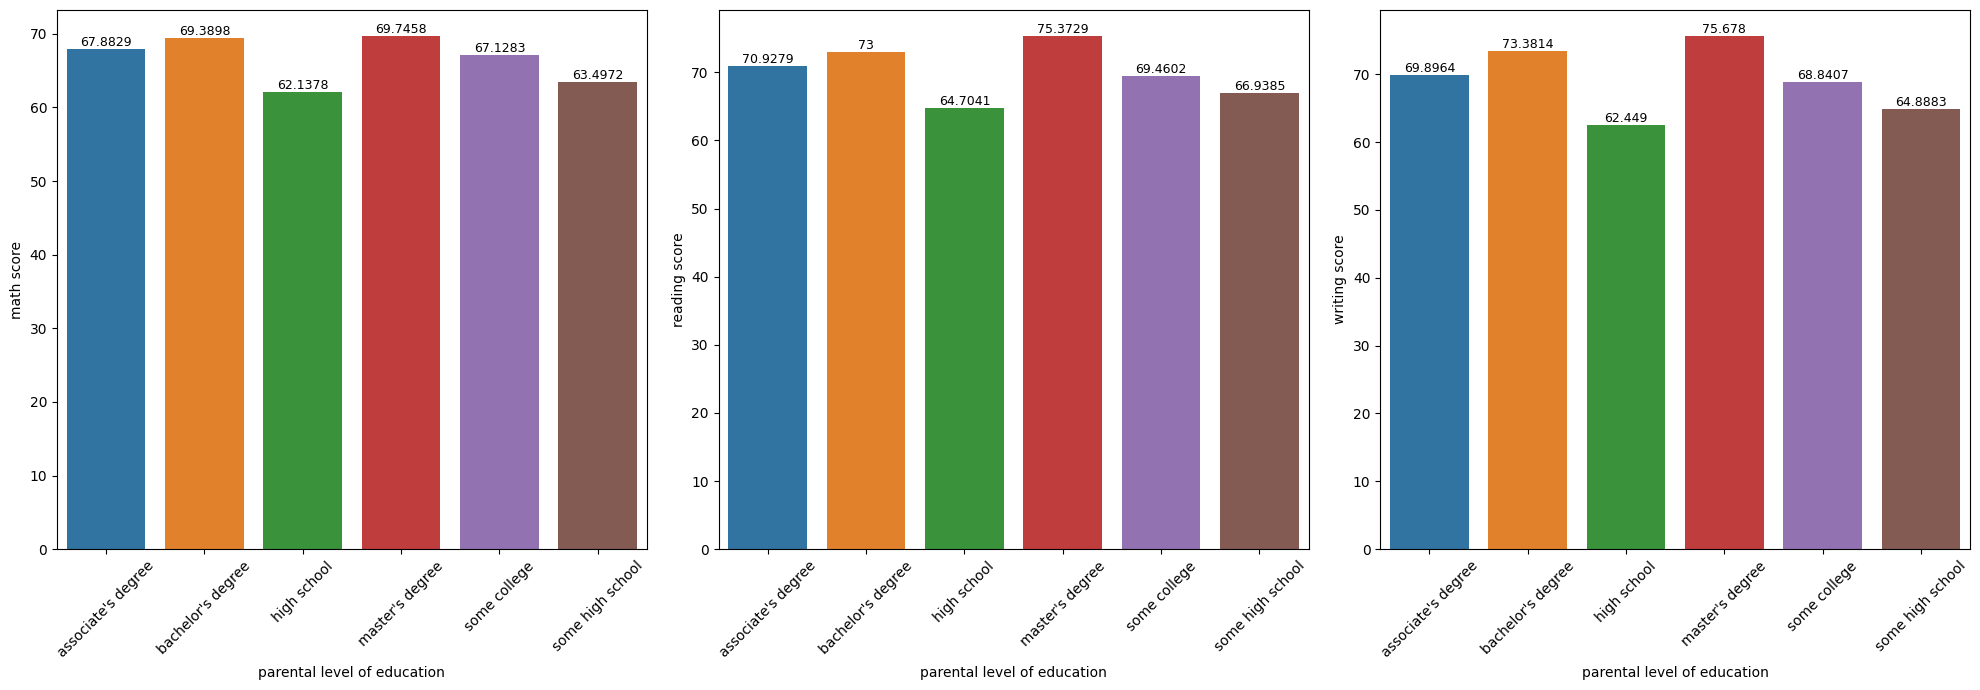

In [70]:
data_chart(data_variable,'parental level of education')

#### Insights

    - On all the Score Students who's parent are having a master Degree or Bachelor's degree those students are perfomrmed better

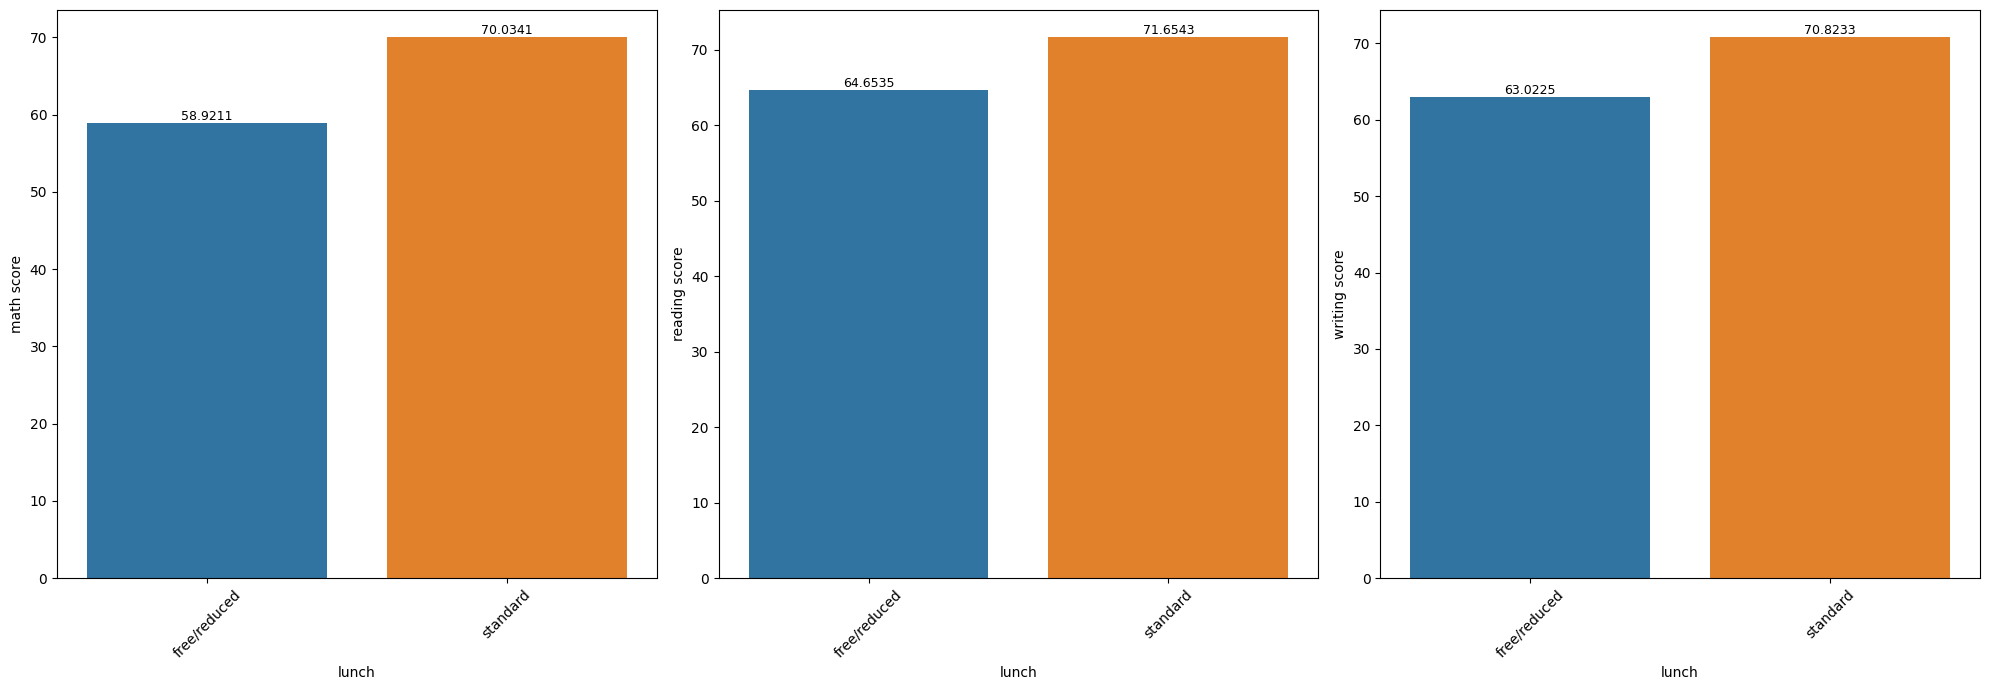

In [71]:
data_chart(data_variable,'lunch')

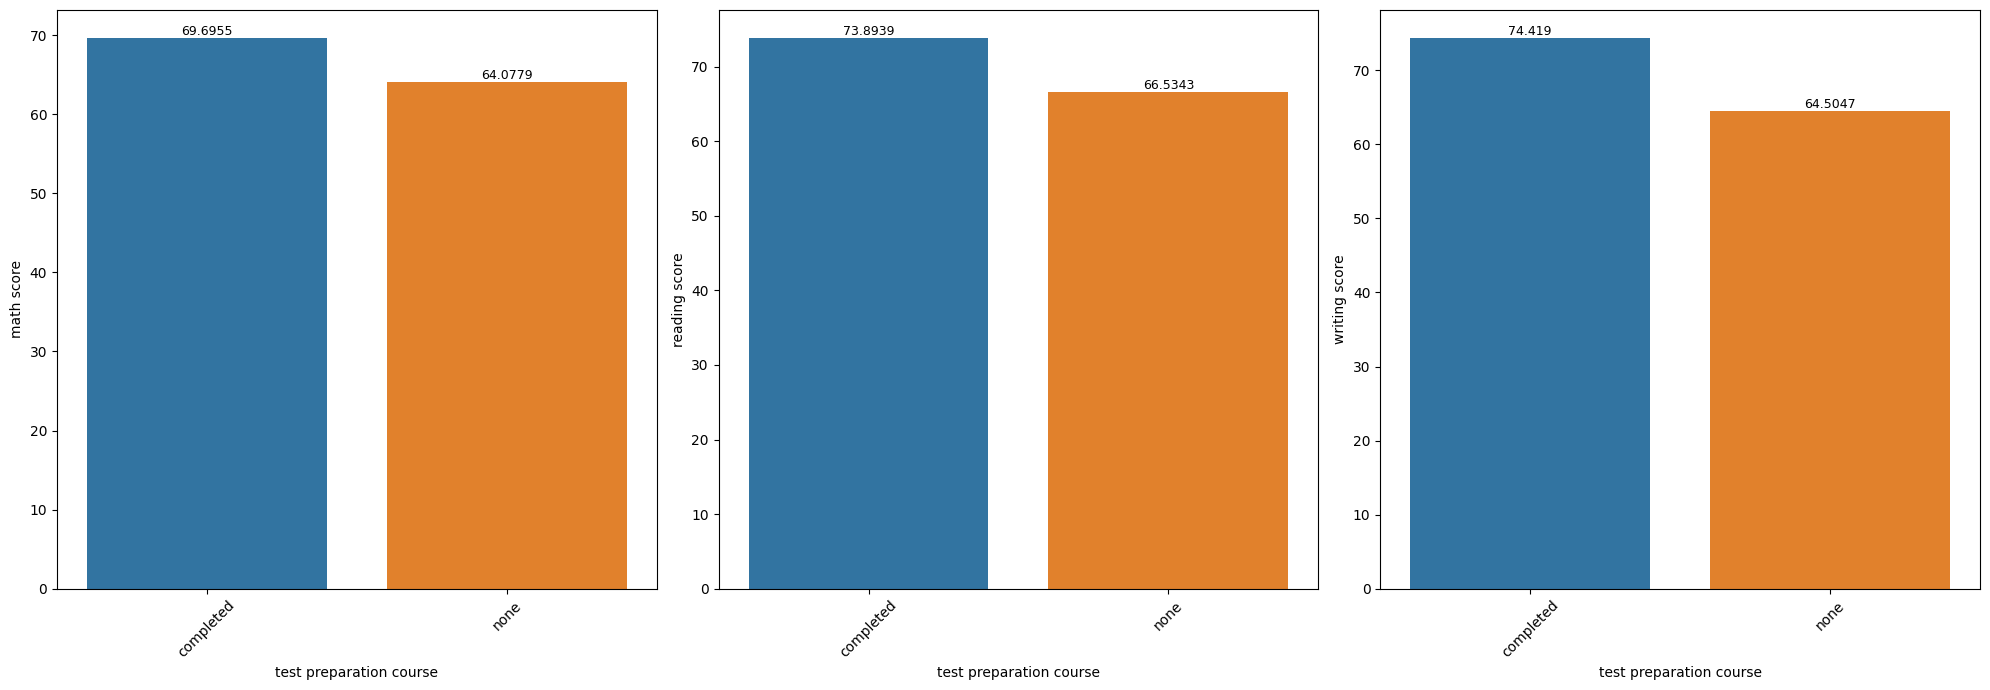

In [72]:
data_chart(data_variable,'test preparation course')

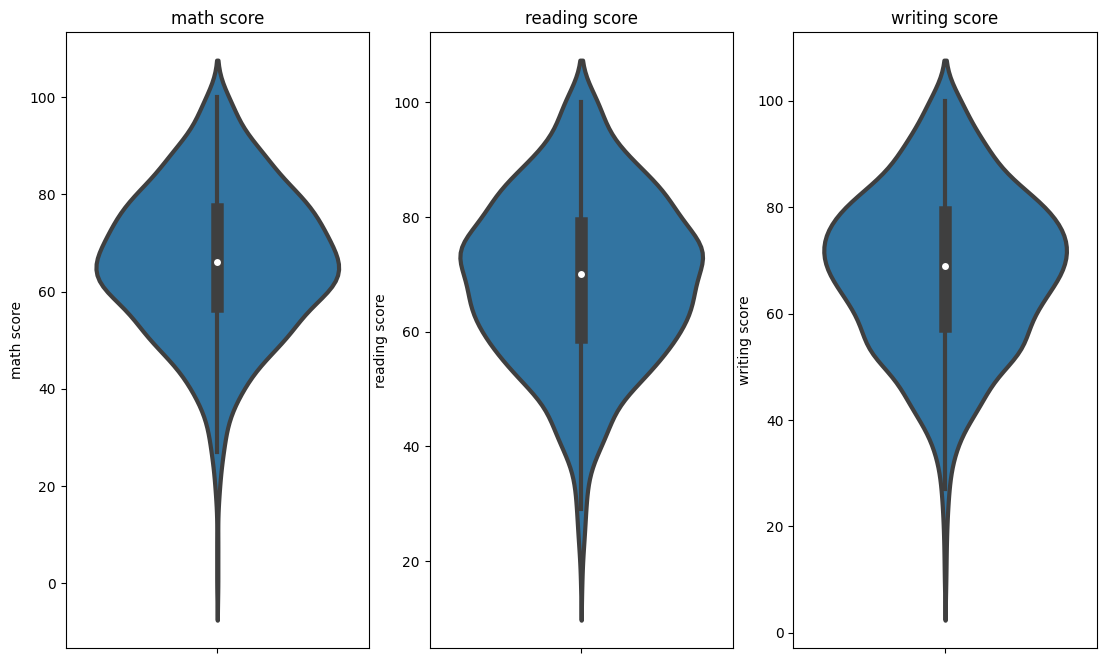

In [75]:

plt.figure(figsize=(18,8))
for i in range(len(num_features)):
    plt.subplot(1, 4, 1+i)
    plt.title(num_features[i])
    sns.violinplot(y=num_features[i],data=df,linewidth=3)

#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

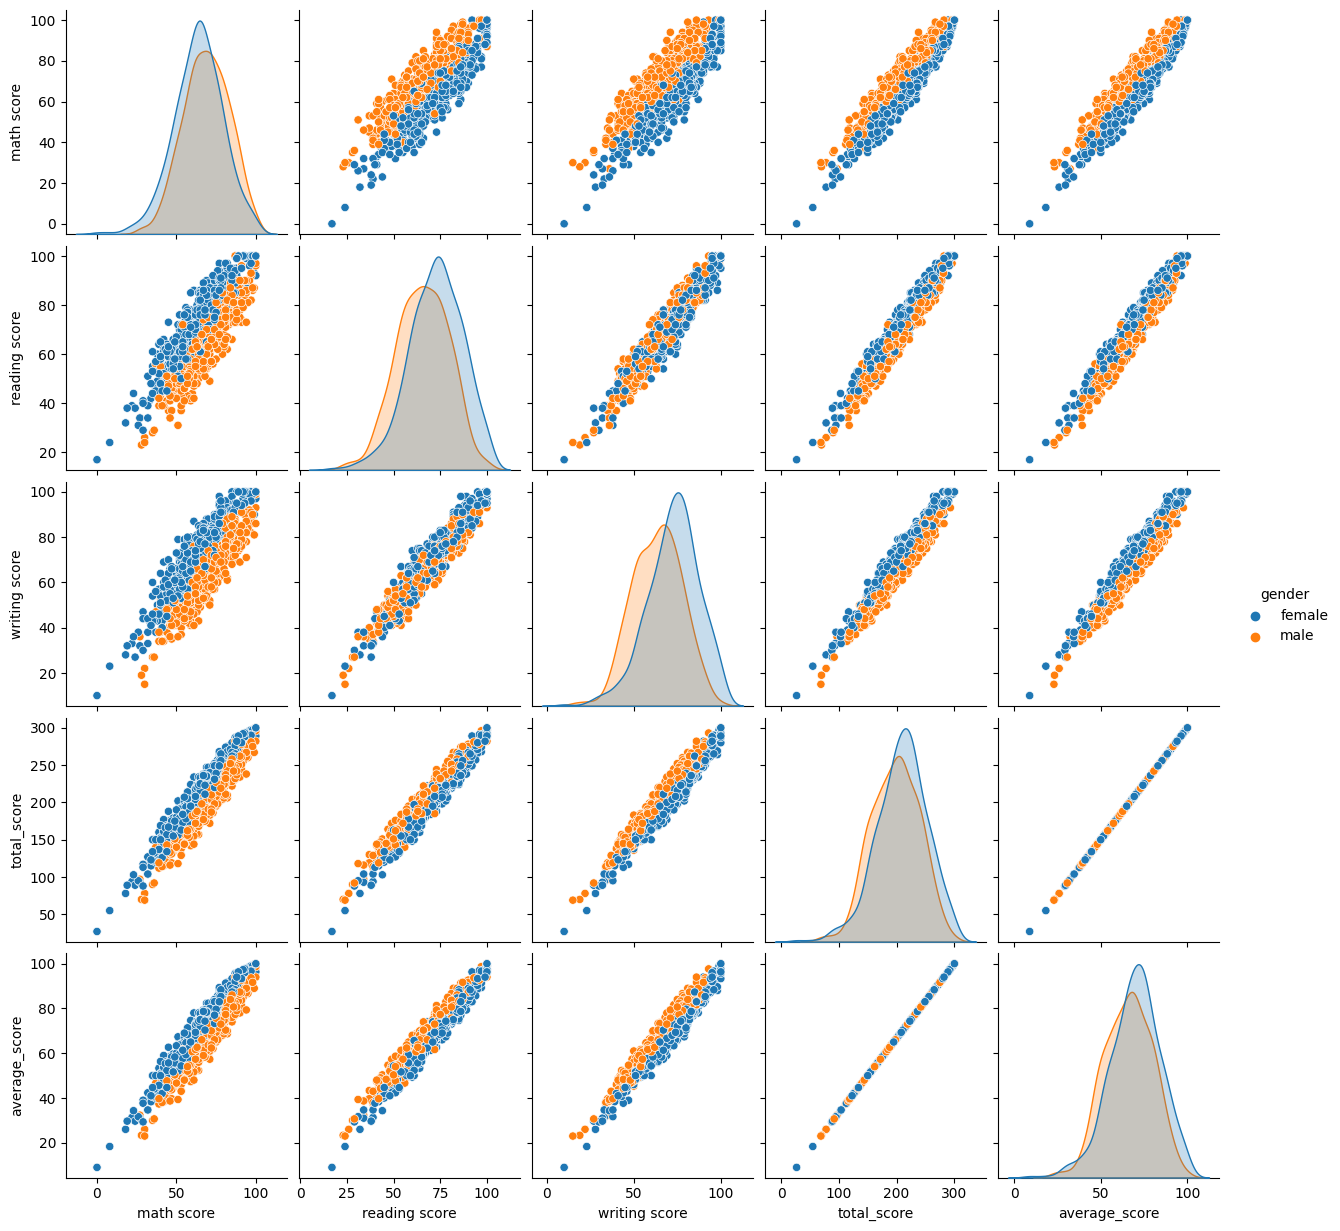

In [34]:
sns.pairplot(df,hue='gender')

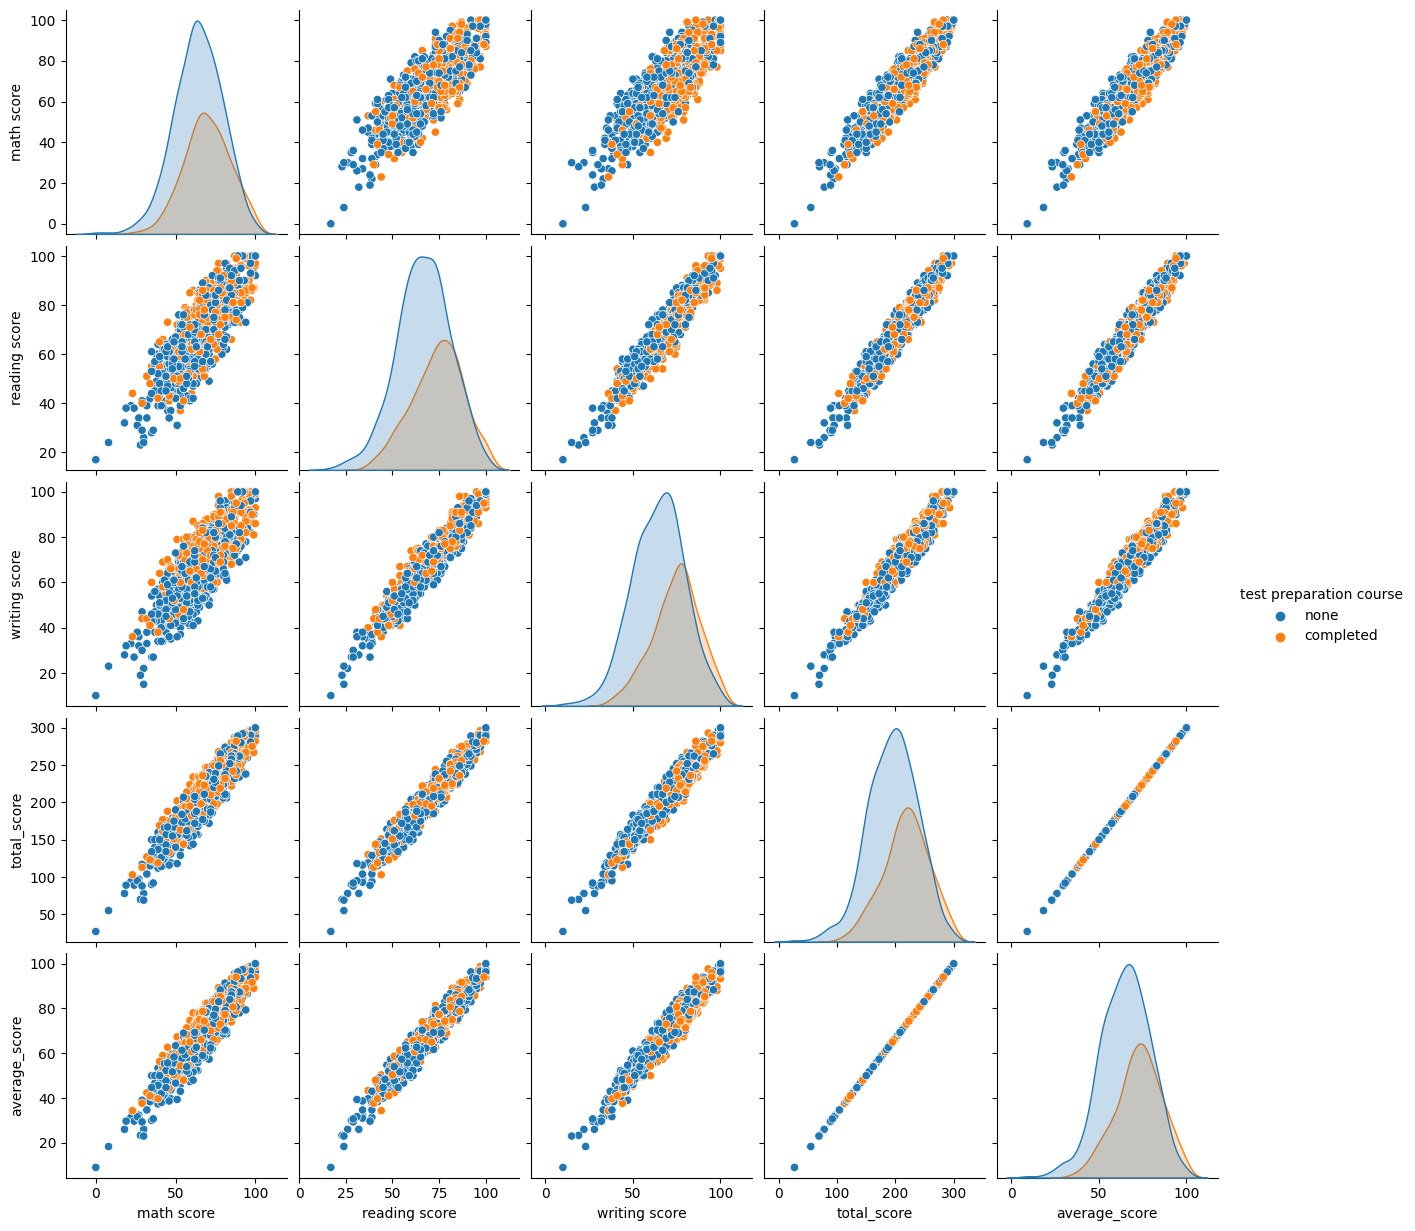

In [29]:
sns.pairplot(df,hue='test preparation course')

In [82]:
def outliers(features):
    plt.figure(figsize = (15,10))
    for i in range(len(features)):
        plt.subplot(141+i)
        sns.boxplot(x = num_features[i], data = df)

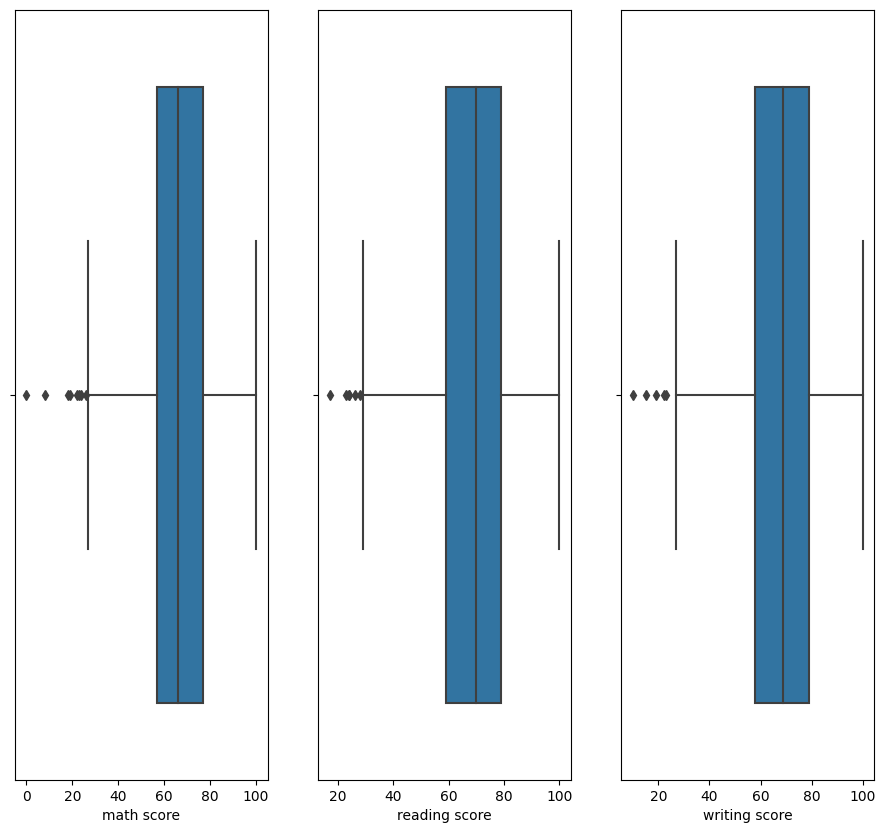

In [83]:
outliers(num_features)

- There are some students who scored verly low score in all the metrics

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.